## Лабораторная работа 3. Визуализация

В рамках второй лабораторной работы были собраны данные из телеграмм-канала, на основе которых в дальнейшем ведется работа

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv("./tproger_data.csv")

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()

In [ ]:
def clean_text(text):
    text = re.sub(r'\*\*', '', text)
    text = re.sub(r'\[(.*?)\]\(.*?\)', r'\1', text)
    text = re.sub(r'\\n', ' ', text)
    return text.strip()

df['clean_text'] = df['text'].astype(str).apply(clean_text)

In [ ]:
df['text_length'] = df['clean_text'].apply(len)
df['engagement'] = df['reactions'] + df['comments']
df['engagement_rate'] = df['engagement'] / df['views']

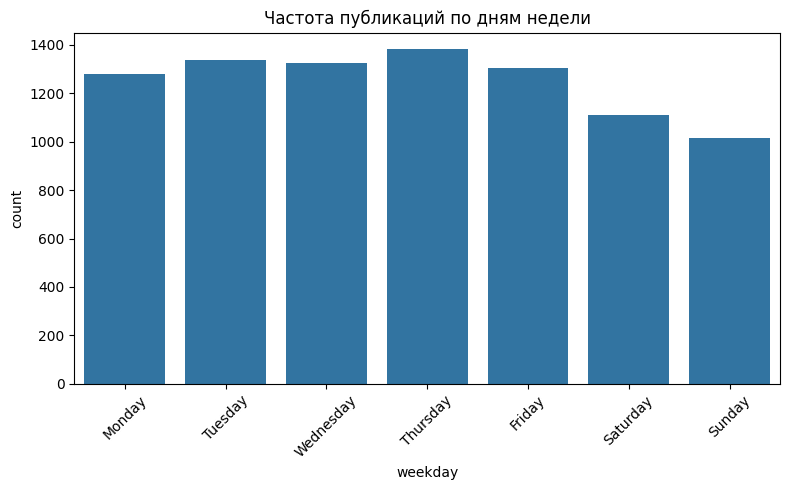

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='weekday', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Частота публикаций по дням недели")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

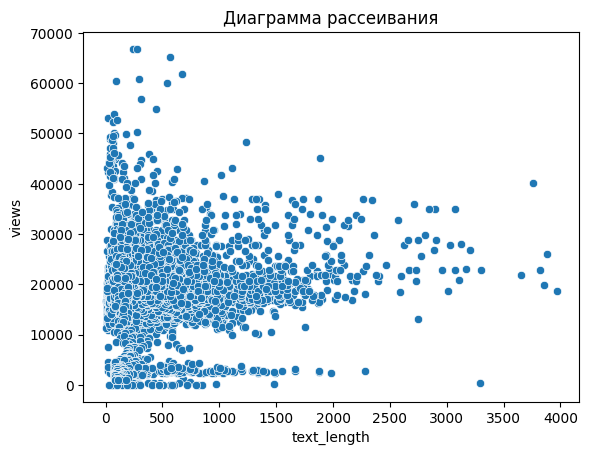

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x = 'text_length', y = 'views')

plt.title('Диаграмма рассеивания')
plt.show()

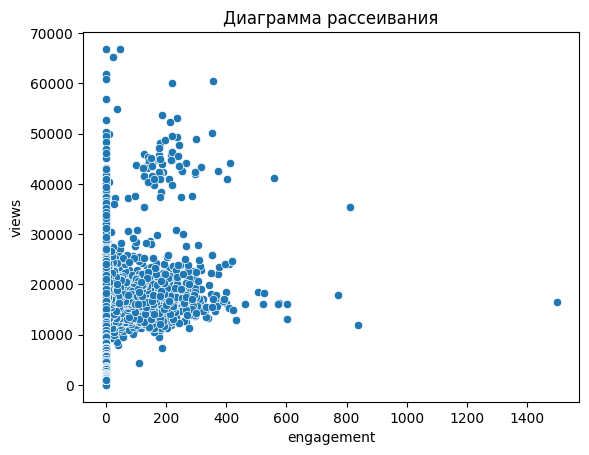

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x = 'engagement', y = 'views')

plt.title('Диаграмма рассеивания')
plt.show()

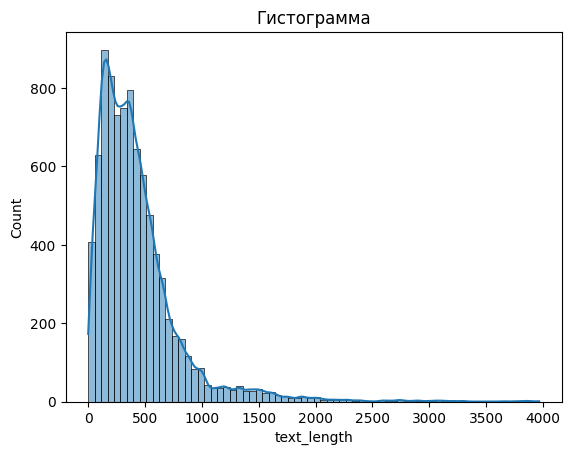

In [ ]:
fig, ax = plt.subplots()
sns.histplot(x = df['text_length'], bins = 70, kde = True, kde_kws = {'bw_adjust': 0.5})

plt.title('Гистограмма')
plt.show()

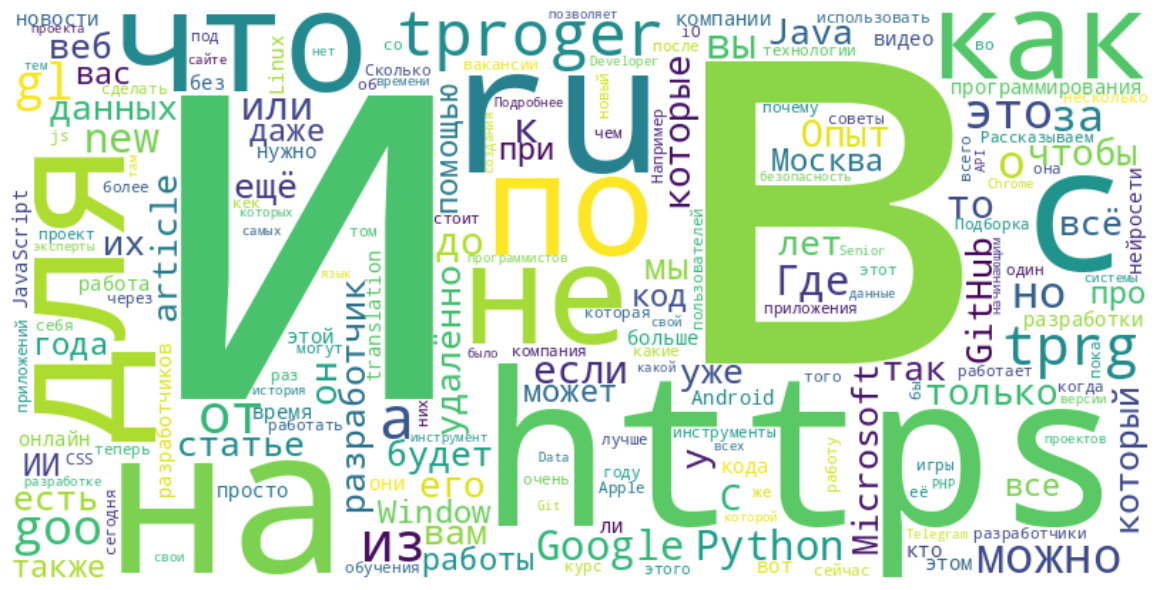

In [ ]:
from wordcloud import WordCloud

all_text = " ".join(df['clean_text'].dropna().astype(str))

wc = WordCloud(width=800, height=400, background_color="white")
wc.generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()